## 14.4 Homework

1) Import the visual package in python to make an animation on the screen of the position of the particle in Brownian motion.

2) Rewrite the radioactive decay, to generate 1000 random numbers following the non-uniformed distribution.

## 1) Import the visual package in python to make an animation on the screen of the position of the particle in Brownian motion.

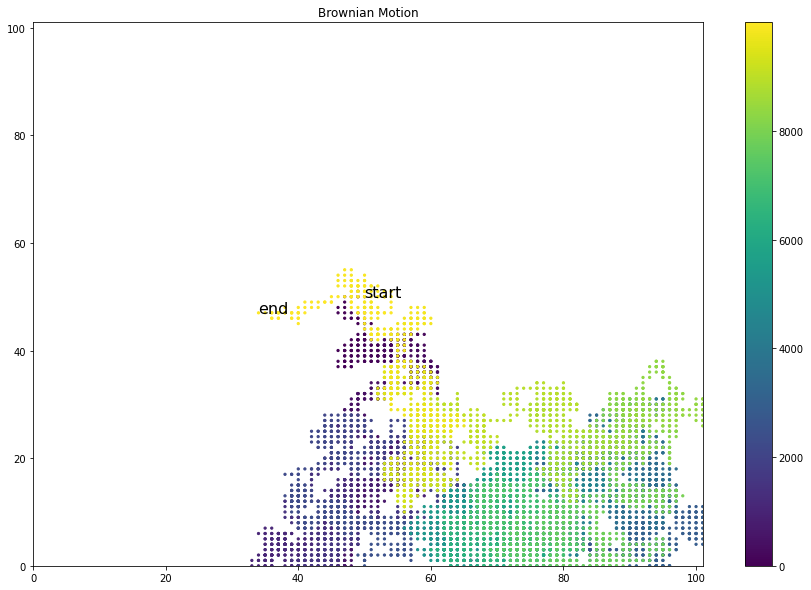

In [1]:
#Import relevant libraries

%matplotlib notebook 
#^Allows me to display plots in an interactive window
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#For size of the first plot
fig = plt.figure(figsize=[15, 10])
L1 = 101
L2 = 101
N = 10000

position = np.empty([N,2]) 
position[0,0] = int(L1/2)
position[0,1] = int(L2/2)
direction = np.array([[0,1],[0,-1],[1,0],[-1,0]])

#Random walk
for i in range(1,N):
    position1 = [-1,-1]
    while min(position1)<0 or position1[0] >L1 or position1[1] >L2:
        move = np.random.randint(len(direction))
        position1 = position[i-1,:] + direction[move]
        
    position[i,:] = position1
#Plot graph
plt.xlim(0, 101)
plt.ylim(0, 101)
plt.title('Brownian Motion')
plt.scatter(position[:,0], position[:,1], c = range(N), s = 5)
plt.text(position[0,0], position[0,1], 'start', fontsize = 16)
plt.text(position[-1,0], position[-1,1], 'end', fontsize = 16)

plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>

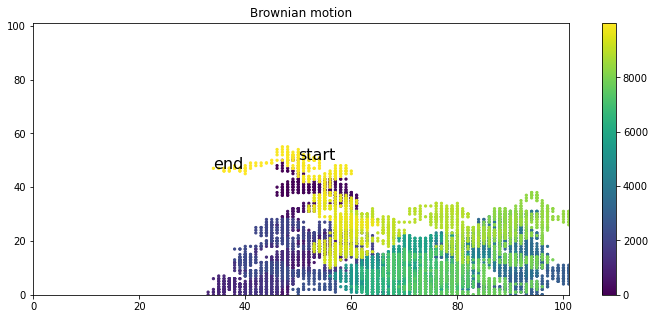

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

It takes 166.5500180721283 seconds to complete.


In [2]:
from vpython import *
import time


plt.figure(figsize = [12, 5])
plt.xlim(0,101)
plt.ylim(0,101)
plt.title('Brownian motion')
plt.scatter(position[:,0], position[:,1], c = range(N), s = 5)
plt.text(position[0,0], position[0,1], 'start', fontsize = 16)
plt.text(position[-1,0], position[-1,1], 'end', fontsize = 16)

plt.colorbar()
plt.show()

scene2 = canvas(title = 'Brownian Motion',
     center= vector(int(L1/2),int(L1/2),0), background = color.black)
redbox = box(pos = vector(int(L1/2),int(L1/2),0),size = vector(101,101,0),color = color.red,opacity = 0.5)
distant_light(direction = vector(int(L1/2),int(L1/2),0), color = color.yellow)
wallL = box(pos = vector(0,int(L1/2),0), size = vector(1,101,0), color = color.green,opacity = 1) 
wallR = box(pos = vector(int(L1),int(L1/2),0), size = vector(1,101,0), color = color.green,opacity = 1) 
wallU = box(pos = vector(int(L1/2),int(L1),0), size = vector(101,1,0), color = color.green,opacity = 1) 
wallD = box(pos = vector(int(L1/2),0,0), size = vector(101,1,0), color = color.green,opacity = 1) 
blueball = sphere(pos = vector(int(L1/2),int(L1/2),0),size = vector(1,1,0),color = color.cyan,opacity = 1)
t = 0

t1 = time.time()
while t < len(position):
    sleep(0.0001)
    blueball.pos = vector(int(position[t][0]),int(position[t][1]),1)
    t += 1

t2 = time.time()
print('It takes', t2-t1, 'seconds to complete.')

I was having trouble getting my plot to animate and zoom in and out, but it seems to be working now.
I didn't have time to look into why the plot is coming out dark... I'll work it out and resubmit once I do.

## 2) Rewrite the radioactive decay, to generate 1000 random numbers following the non-uniformed distribution.

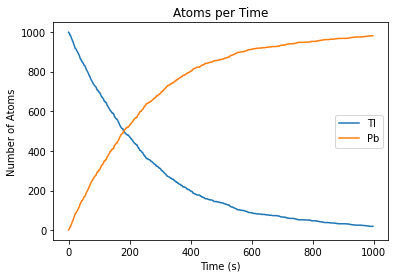

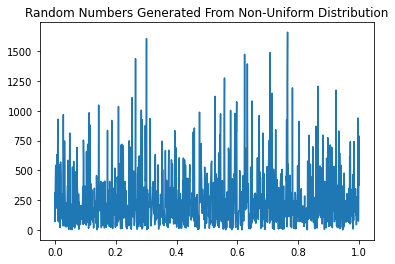

In [3]:
#Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

tau = 3.053*60

Atoms = 1000   #1000 Tl atoms
Time = 1000   #1000 seconds
mu = np.log(2)/tau
N_Pb = np.zeros([Time-1])  #the array to store the number of decayed atoms in each time step 
N_Tl = Atoms * np.ones([Time-1])  #the array to store the number of decayed atoms in each time step 

x = []
for i in range(Atoms):    
    z0 = np.random.random()
    x0 = int(-np.log(1-z0)/mu) #the time to decay from random number
    x.append(x0)
    if x0<Time:     
        N_Pb[x0:] += 1  #after decay, we need to count 1 from now on
        N_Tl[x0:] -= 1  #after decay, we need to count 1 from now on

#Plot graph
plt.title('Atoms per Time')
plt.plot(N_Tl, label = 'Tl')
plt.plot(N_Pb, label = 'Pb')
plt.xlabel("Time (s)")
plt.ylabel("Number of Atoms")

plt.legend()
plt.show()

plt.title('Random Numbers Generated From Non-Uniform Distribution')
plt.plot(np.linspace(0,1,1000),x)
plt.show()
